In [1]:
import pandas as pd
import numpy as np

In [24]:
def reddit_table(text, drop_columns=['Games Count', 'Win %', 'Lose %', '95% Confidence', '% of Games']):
    table_data = [
        line.split('\t')
        for line in text.strip().split('\n')
    ]
    
    columns = table_data[0]
    df = pd.DataFrame(
        table_data[1:-1], # first col is header, last col is total; drop both
        columns=columns
    ).set_index(columns[0])
    
    if drop_columns: # get rid of non-numbers/pcts/extra columns
        df = df.drop(drop_columns, axis=1)
        
    # Words -> numbers. I.E. "394" -> 349.0
    df = df.astype(np.float64)
    
    # Normalize the first column name
    df.index.name = 'Team Composition'

    return df
    

# copy/paste from https://www.reddit.com/r/heroesofthestorm/comments/hrw1u9/do_5_stacks_have_an_advantage_the_stats_revealed/
# See the table headed with "This table shows the overall wins and loses for each composition type"
reddit_matches = reddit_table("""
Team Composition	Win	Lose	Games Count	Win %	Lose %	95% Confidence	% of Games
5 Stack	857	756	1613	53%	47%	±2%	10%
1 Solo Players + 4 Stack	700	606	1306	54%	46%	±3%	8%
3 Stack + 2 Stack	201	199	400	50%	50%	±5%	2%
2 Solo Players + 3 Stack	1437	1426	2863	50%	50%	±2%	17%
1 Solo Players + 2 Stack + 2 Stack	677	666	1343	50%	50%	±3%	8%
3 Solo Players + 2 Stack	2544	2590	5134	50%	50%	±1%	31%
5 Solo Players	1994	2167	4161	48%	52%	±2%	25%
Overall	8410	8410	16820	50%	50%	±1%	100%""")

# Now show it
reddit_matches

,Win,Lose
Team Composition,,
5 Stack,857.0,756.0
1 Solo Players + 4 Stack,700.0,606.0
3 Stack + 2 Stack,201.0,199.0
2 Solo Players + 3 Stack,1437.0,1426.0
1 Solo Players + 2 Stack + 2 Stack,677.0,666.0
3 Solo Players + 2 Stack,2544.0,2590.0
5 Solo Players,1994.0,2167.0


### Calculate most likely solo win rate (based on reddit data)

In [23]:
solos_per_comp = pd.Series({
    '5 Stack': 0.,
    '1 Solo Players + 4 Stack': 1.,
    '3 Stack + 2 Stack': 0.,
    '2 Solo Players + 3 Stack': 2.,
    '1 Solo Players + 2 Stack + 2 Stack': 1.,
    '3 Solo Players + 2 Stack': 3.,
    '5 Solo Players': 5.,
})

def calculate_solo_win_rate(matches):
    solo_wins = (matches['Win'] * solos_per_comp).sum()
    solo_losses = (matches['Lose'] * solos_per_comp).sum()
    
    return solo_wins / (solo_wins + solo_losses)

print("Solo Win Rate: %.2f%%" % (calculate_solo_win_rate(reddit_matches) * 100))

Solo Win Rate: 49.02%


### Collect matchups

In [32]:
matchups = pd.concat({
    '5 Stack': reddit_table("""
5 Stack vs Team Composition	Win	Lose	Games Count	Win %	Lose %	95% Confidence	% of Games
5 Stack	118	118	263	50%	50%	±0%	8%
1 Solo Players + 4 Stack	72	88	160	45%	55%	±8%	11%
3 Stack + 2 Stack	18	14	32	56%	44%	±17%	2%
2 Solo Players + 3 Stack	176	162	338	52%	48%	±5%	23%
1 Solo Players + 2 Stack + 2 Stack	78	52	130	60%	40%	±8%	9%
3 Solo Players + 2 Stack	392	320	712	55%	45%	±4%	48%
5 Solo Players	3	2	5	60%	40%	±33%	0%
Overall	857	756	1613	53%	47%	±2%	100%"""),
    '1 Solo Players + 4 Stack': reddit_table("""
1 Solo Players + 4 Stack vs Team Composition	Win	Lose	Games Count	Win %	Lose %	95% Confidence	% of Games
5 Stack	88	72	160	55%	45%	±8%	10%
1 Solo Players + 4 Stack	42	42	84	50%	50%	±0%	6%
3 Stack + 2 Stack	22	14	36	61%	39%	±15%	3%
2 Solo Players + 3 Stack	107	84	191	56%	44%	±7%	15%
1 Solo Players + 2 Stack + 2 Stack	42	66	108	39%	61%	±9%	8%
3 Solo Players + 2 Stack	210	190	400	53%	48%	±5%	31%
5 Solo Players	189	138	327	58%	42%	±5%	25%
Overall	700	606	1306	54%	46%	±3%	100%"""),
    '3 Stack + 2 Stack': reddit_table("""
3 Stack + 2 Stack vs Team Composition	Win	Lose	Games Count	Win %	Lose %	95% Confidence	% of Games
5 Stack	14	18	32	44%	56%	±17%	2%
1 Solo Players + 4 Stack	14	22	36	39%	61%	±15%	9%
3 Stack + 2 Stack	11	11	22	50%	50%	±0%	6%
2 Solo Players + 3 Stack	43	48	91	47%	53%	±10%	23%
1 Solo Players + 2 Stack + 2 Stack	25	18	43	58%	42%	±14%	11%
3 Solo Players + 2 Stack	57	45	102	56%	44%	±10%	26%
5 Solo Players	37	37	74	50%	50%	±11%	19%
Overall	201	199	400	50%	50%	±5%	100%"""),
    '2 Solo Players + 3 Stack': reddit_table("""
2 Solo Players + 3 Stack vs Team Composition	Win	Lose	Games Count	Win %	Lose %	95% Confidence	% of Games
5 Stack	162	176	338	48%	52%	±5%	21%
1 Solo Players + 4 Stack	84	107	191	44%	56%	±7%	7%
3 Stack + 2 Stack	48	43	91	53%	47%	±10%	3%
2 Solo Players + 3 Stack	224	224	448	50%	50%	±0%	16%
1 Solo Players + 2 Stack + 2 Stack	129	120	249	52%	48%	±6%	9%
3 Solo Players + 2 Stack	410	412	822	50%	50%	±3%	29%
5 Solo Players	380	344	724	52%	48%	±4%	25%
Overall	1437	1426	2863	50%	50%	±0%	100%"""),
    '1 Solo Players + 2 Stack + 2 Stack': reddit_table("""
1 Solo Player + 2 stack + 2 Stack vs Team Composition	Win	Lose	Games Count	Win %	Lose %	95% Confidence	% of Games
5 Stack	52	78	130	40%	60%	±8%	8%
1 Solo Players + 4 Stack	66	42	108	61%	39%	±9%	8%
3 Stack + 2 Stack	18	25	43	42%	58%	±14%	3%
2 Solo Players + 3 Stack	120	129	249	48%	52%	±6%	19%
1 Solo Players + 2 Stack + 2 Stack	83	83	166	50%	50%	±0%	12%
3 Solo Players + 2 Stack	190	179	369	51%	49%	±5%	27%
5 Solo Players	148	130	278	53%	47%	±6%	21%
Overall	677	666	1343	50%	50%	±3%	100%"""),
    '3 Solo Players + 2 Stack': reddit_table("""
3 Solo Players + 2 Stack vs Team Composition	Win	Lose	Games Count	Win %	Lose %	95% Confidence	% of Games
5 Stack	320	392	712	45%	55%	±4%	44%
1 Solo Players + 4 Stack	190	210	400	48%	53%	±5%	8%
3 Stack + 2 Stack	45	57	102	44%	56%	±10%	2%
2 Solo Players + 3 Stack	412	410	822	50%	50%	±3%	16%
1 Solo Players + 2 Stack + 2 Stack	179	190	369	49%	51%	±5%	7%
3 Solo Players + 2 Stack	732	732	1464	50%	50%	±0%	29%
5 Solo Players	666	599	1265	53%	47%	±3%	25%
Overall	2544	2590	5134	50%	50%	±1%	100%"""),
    '5 Solo Players': reddit_table("""
5 Solo Players vs Team Composition	Win	Lose	Games Count	Win %	Lose %	95% Confidence	% of Games
5 Stack	2	3	5	40%	60%	±33%	0%
1 Solo Players + 4 Stack	138	189	327	42%	58%	±5%	8%
3 Stack + 2 Stack	37	37	74	50%	50%	±11%	2%
2 Solo Players + 3 Stack	344	380	724	48%	52%	±4%	17%
1 Solo Players + 2 Stack + 2 Stack	130	148	278	47%	53%	±6%	7%
3 Solo Players + 2 Stack	599	666	1265	47%	53%	±3%	30%
5 Solo Players	744	744	1488	50%	50%	±0%	36%
Overall	1994	2167	4161	48%	52%	±2%	100%""")
}, axis=0)

matchups.index.names = ['team 1', 'team 2']

print('Total Matches: %d' % matchups.sum().sum())

matchups

Total Matches: 16820


Win  \
team 1                             team 2                                      
1 Solo Players + 2 Stack + 2 Stack 5 Stack                              52.0   
                                   1 Solo Players + 4 Stack             66.0   
                                   3 Stack + 2 Stack                    18.0   
                                   2 Solo Players + 3 Stack            120.0   
                                   1 Solo Players + 2 Stack + 2 Stack   83.0   
                                   3 Solo Players + 2 Stack            190.0   
                                   5 Solo Players                      148.0   
1 Solo Players + 4 Stack           5 Stack                              88.0   
                                   1 Solo Players + 4 Stack             42.0   
                                   3 Stack + 2 Stack                    22.0   
                                   2 Solo Players + 3 Stack            107.0   
                                   1 Solo Players + 2 Stack + 2 Stack   42.0   
                                   3 Solo Players + 2 Stack            210.0   
                                   5 Solo Players                      189.0   
2 Solo Players + 3 Stack           5 Stack                             162.0   
                                   1 Solo Players + 4 Stack             84.0   
                                   3 Stack + 2 Stack                    48.0   
                                   2 Solo Players + 3 Stack            224.0   
                                   1 Solo Players + 2 Stack + 2 Stack  129.0   
                                   3 Solo Players + 2 Stack            410.0   
                                   5 Solo Players                      380.0   
3 Solo Players + 2 Stack           5 Stack                             320.0   
                                   1 Solo Players + 4 Stack            190.0   
                                   3 Stack + 2 Stack                    45.0   
                                   2 Solo Players + 3 Stack            412.0   
                                   1 Solo Players + 2 Stack + 2 Stack  179.0   
                                   3 Solo Players + 2 Stack            732.0   
                                   5 Solo Players                      666.0   
3 Stack + 2 Stack                  5 Stack                              14.0   
                                   1 Solo Players + 4 Stack             14.0   
                                   3 Stack + 2 Stack                    11.0   
                                   2 Solo Players + 3 Stack             43.0   
                                   1 Solo Players + 2 Stack + 2 Stack   25.0   
                                   3 Solo Players + 2 Stack             57.0   
                                   5 Solo Players                       37.0   
5 Solo Players                     5 Stack                               2.0   
                                   1 Solo Players + 4 Stack            138.0   
                                   3 Stack + 2 Stack                    37.0   
                                   2 Solo Players + 3 Stack            344.0   
                                   1 Solo Players + 2 Stack + 2 Stack  130.0   
                                   3 Solo Players + 2 Stack            599.0   
                                   5 Solo Players                      744.0   
5 Stack                            5 Stack                             118.0   
                                   1 Solo Players + 4 Stack             72.0   
                                   3 Stack + 2 Stack                    18.0   
                                   2 Solo Players + 3 Stack            176.0   
                                   1 Solo Players + 2 Stack + 2 Stack   78.0   
                                   3 Solo Players + 2 Stack            392.0   
                                   5 Solo Players                        

### Bootstrap: Now sample new tables (by randomly drawing from matches that actually occurred with replacement)

In [97]:
def sample_matchup(distribution, u):
    # Common ML Engineer interview question btw
    
    matchups = distribution.index
    cumProb = 0.
    for i, prob in enumerate(distribution.values):
        cumProb += prob
        if u <= cumProb:
            return matchups[i]
    
    return matchups[-1]

total_matches = matchups.sum().sum()
distribution = matchups.stack() / total_matches
distribution = distribution.sort_values(ascending=False)

def bootstrapped_table(random_state):
    n_draws = int(total_matches) // 2
    matches = []
    uniforms = random_state.uniform(0., 1., size=(n_draws,))
    for u in uniforms:
        left_team, right_team, left_outcome = sample_matchup(distribution, u)
        right_outcome = "Win" if left_outcome == "Lose" else "Lose"
        
        matches.append((left_team, left_outcome, 1.0))
        matches.append((right_team, right_outcome, 1.0))
        
    # Map/Reduce by sum
    table = (
        pd.DataFrame(
            matches,
            columns=['Team Composition', 'Outcome', 'Count']
        )
        .groupby(['Team Composition', 'Outcome']).Count.sum()
        .unstack('Outcome')
    )
        
    return table


example = bootstrapped_table(np.random.RandomState(1))
print("Example bootstrapped table (sampled winrate: %.2f%%):" % (calculate_solo_win_rate(example) * 100))
example

Example bootstrapped table (sampled winrate: 49.04%):


Outcome,Lose,Win
Team Composition,,
1 Solo Players + 2 Stack + 2 Stack,624.0,683.0
1 Solo Players + 4 Stack,626.0,716.0
2 Solo Players + 3 Stack,1432.0,1396.0
3 Solo Players + 2 Stack,2525.0,2579.0
3 Stack + 2 Stack,185.0,196.0
5 Solo Players,2243.0,2022.0
5 Stack,775.0,818.0


In [96]:
n_tables = 10000
random_state = np.random.RandomState(2)
sampled_tables = [
    bootstrapped_table(random_state)
    for _ in range(n_tables)
]

In [98]:
sampled_winrates = pd.Series([
    calculate_solo_win_rate(x)
    for x in sampled_tables
])

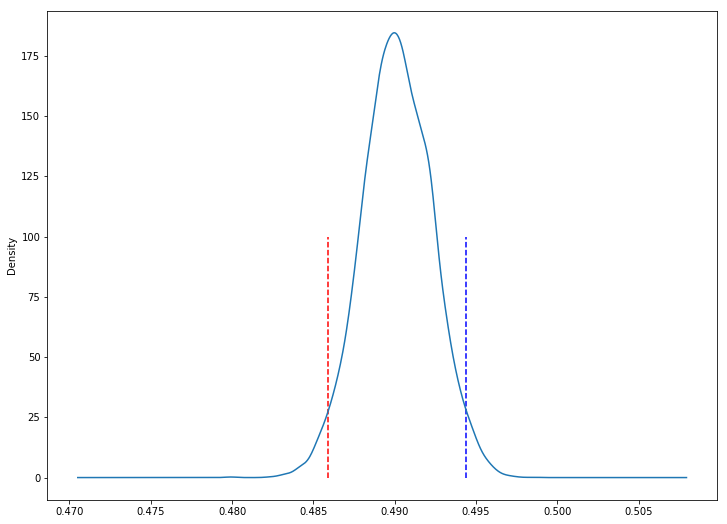

In [116]:
confidence = 0.95
error = 1 - confidence
upper = sampled_winrates.quantile(1 - error / 2.)
lower = sampled_winrates.quantile(error / 2.)
ax = sampled_winrates.plot.kde(figsize=(12, 9))
ax.vlines(lower, ymin=0, ymax=100, linestyles='dashed', color='red')
ax.vlines(upper, ymin=0, ymax=100, linestyles='dashed', color='blue')

### Solo win rate: Upper confidence (95%)

In [117]:
print(upper)

0.49439171873500043


### Solo win rate: Lower confidence (95%)

In [118]:
print(lower)

0.48588813185626994
